In [18]:
from pandas import read_csv
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [8]:
#read_csv("Airpassengers.csv")
df = read_csv("Airpassengers.csv",usecols=[1])         #Don't want the Oth/First columns (Month)
df.head()

,#Passengers
0,112
1,118
2,132
3,129
4,121


In [10]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [11]:
values = df.values.astype("float32")              #For Scaling
values.shape

(144, 1)

In [12]:
train_size = int(values.shape[0]*0.67)                    #Training in 2/3 and testing on 1/3
test_size = values.shape[0] - train_size
train_size

96

In [13]:
train = values[:train_size]
test = values[train_size:]

In [17]:
sc = MinMaxScaler(feature_range=(0,1))

train = sc.fit_transform(train)
test = sc.transform(test)

In [37]:
def create_dataset(data,k):                       #K - Lookback
    dataX,dataY =  [],[]
    for i in range(data.shape[0] - k):
        dataX.append(data[i:i+k,0])
        dataY.append(data[i+k,0])
        
    return np.array(dataX),np.array(dataY)

In [38]:
look_back = 12
X_train, y_train = create_dataset(train,look_back)
X_test, y_test = create_dataset(test,look_back)
X_train.shape

(84, 12)

In [39]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [40]:
X_train.shape

(84, 12, 1)

In [41]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense

In [94]:
model = Sequential()

model.add(SimpleRNN(3,input_shape=(look_back,1)))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(X_train,y_train,epochs=25,batch_size=1)

Epoch 1/25
84/84 [==============================] - 1s 11ms/step - loss: 0.1838
Epoch 2/25
84/84 [==============================] - 1s 6ms/step - loss: 0.0449A: 0s - los
Epoch 3/25
84/84 [==============================] - 1s 7ms/step - loss: 0.0183
Epoch 4/25
84/84 [==============================] - 1s 7ms/step - loss: 0.0111
Epoch 5/25
84/84 [==============================] - 1s 7ms/step - loss: 0.0090
Epoch 6/25
84/84 [==============================] - 1s 7ms/step - loss: 0.0079
Epoch 7/25
84/84 [==============================] - 1s 7ms/step - loss: 0.0076
Epoch 8/25
84/84 [==============================] - 1s 7ms/step - loss: 0.0074
Epoch 9/25
84/84 [==============================] - 1s 7ms/step - loss: 0.0073
Epoch 10/25
84/84 [==============================] - 1s 7ms/step - loss: 0.0072
Epoch 11/25
84/84 [==============================] - 1s 7ms/step - loss: 0.0071
Epoch 12/25
84/84 [==============================] - 1s 7ms/step - loss: 0.0070
Epoch 13/25
84/84 [==================

In [95]:
y_pred = model.predict(X_test)
y_pred = sc.inverse_transform(y_pred).ravel()              #(36,1) --> (36,)       #Flatten

y_pred_train = model.predict(X_train)
y_pred_train = sc.inverse_transform(y_pred_train).ravel()             

y_true_train = sc.inverse_transform([y_train]).ravel()             #Make y 2-D
y_true_test = sc.inverse_transform([y_test]).ravel()

In [96]:
import matplotlib.pyplot as plt

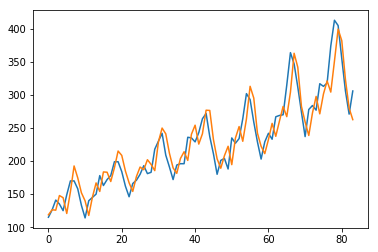

In [97]:
plt.plot(y_true_train)
plt.plot(y_pred_train)

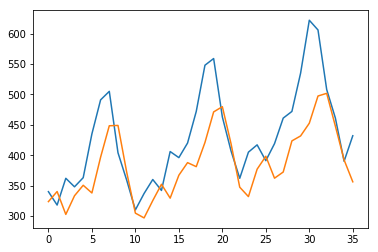

In [98]:
plt.plot(y_true_test)
plt.plot(y_pred)

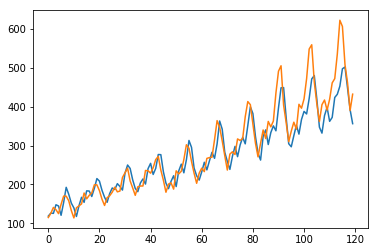

In [99]:
combinedPredicted = np.concatenate((y_pred_train,y_pred))
combinedTrue = np.concatenate((y_true_train,y_true_test))           #Double Brackets

plt.plot(combinedPredicted)
plt.plot(combinedTrue)